In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/spam.csv", \
                 sep=',', encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"text"})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['y'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text,y
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
print(df.shape)
print(df.label.value_counts())

(5572, 3)
label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
def extract_features(email, B=1024):
    # initialize all-zeros feature vector
    v = np.zeros(B)
    email = ' '.join(email)
    # breaks for non-ascii characters
    tokens = email.split()
    for token in tokens:
        v[hash(token) % B] = 1
    return v

In [ ]:
def load_spam_data(extract_features, B=1024):

    xs = np.zeros((df.shape[0], B))

    labels = df['y'].values

    for i, email in enumerate(df['text']):
        xs[i, :] = extract_features(email, B)
    return xs

Xspam = load_spam_data(extract_features)
Xspam.shape
Yspam = df['y'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xspam, Yspam, test_size = 0.2, random_state = 10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def compute_loss(y, y_pred):
    m = len(y)
    return (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [ ]:
def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []

    for _ in range(epochs):
        # Compute predictions
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Compute loss
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, losses

In [ ]:
def predict(X, weights, bias, threshold=0.5):
    y_pred = sigmoid(np.dot(X, weights) + bias)
    return [1 if i > threshold else 0 for i in y_pred]

In [ ]:
weights, bias, losses = train_logistic_regression(X_train, y_train, learning_rate=0.01, epochs=1000)

In [ ]:
y_pred_train = predict(X_train, weights, bias)
y_pred_test = predict(X_test, weights, bias)

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

training_accuracy = accuracy(y_train, y_pred_train)
validation_accuracy = accuracy(y_test, y_pred_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = conf_matrix.ravel()

In [ ]:
calculated_accuracy = (tp + tn) / (tp + tn + fp + fn)

In [ ]:
lambda_val = 1 / 1.0  # Assuming C = 1.0 as in original code
l2_regularization = (lambda_val / 2) * np.sum(weights**2)

In [ ]:
print(f"Training Accuracy: {training_accuracy:.2f}%")
print(f"Validation Accuracy: {validation_accuracy:.2f}%")

Training Accuracy: 94.79%
Validation Accuracy: 95.16%


In [ ]:
# Print accuracy matrix
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nBreakdown:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")


Confusion Matrix:
[[950  15]
 [ 39 111]]

Breakdown:
True Positives (TP): 111
True Negatives (TN): 950
False Positives (FP): 15
False Negatives (FN): 39


In [ ]:
# Print manually calculated accuracy
print("\nManually Calculated Accuracy: %2.2f%%" % (calculated_accuracy * 100))


Manually Calculated Accuracy: 95.16%


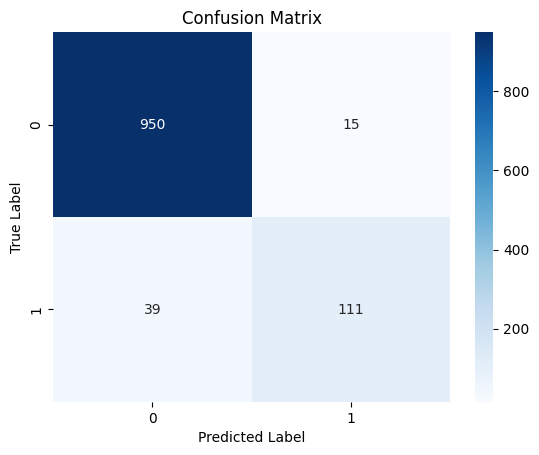

In [ ]:
#  Plot confusion matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("\nL2 Regularization Term: %f" % l2_regularization)


L2 Regularization Term: 1.238951


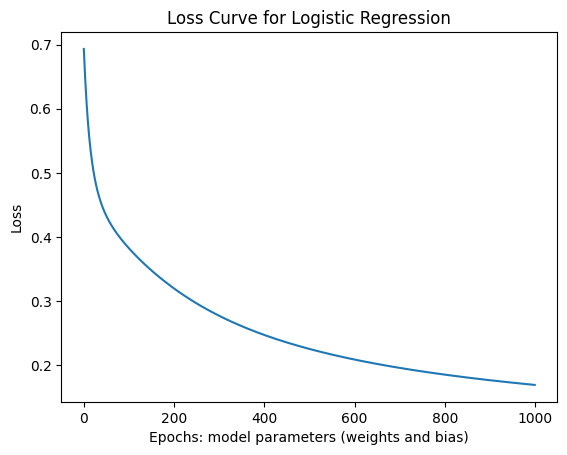

In [ ]:
# Plot loss curve
plt.plot(range(len(losses)), losses)
plt.xlabel("Epochs: model parameters (weights and bias)")
plt.ylabel("Loss")
plt.title("Loss Curve for Logistic Regression")
plt.show()